In [3]:
from sequana import DNA
from sequana import FastA
import pandas as pd
import numpy as np
from sklearn.preprocessing import  StandardScaler
import re

In [37]:
def count_homopolymers(seq, min_length=5):
    # Ex : trouve AAAAA ou TTTTT, etc.
    pattern = re.compile(rf"(A{{{min_length},}}|T{{{min_length},}}|C{{{min_length},}}|G{{{min_length},}})")
    return len(pattern.findall(seq.upper()))

def load_fasta(fasta_path, window_size=100):
    f = FastA(fasta_path)
    data = []
    
    for maseq in f:
        print(maseq.name)
        features = []

        s = DNA(maseq.sequence.upper())
        seq = maseq.sequence.upper()
        s.window = window_size

        #Karlin
        df_karlin = pd.read_csv(f"../data/karlin/{maseq.name}_karlin_{window_size}.csv")
        karlin = df_karlin['Karlin'].tolist()
        karlin = [karlin[i] for i in range(0, len(karlin), window_size)]

        #Entropy
        entropy = s.get_entropy(window_size)
        entropy = [entropy[i] for i in range(0, len(entropy), window_size)]
        
        #Z curve 
        y_vals = [0]
        x_vals = [0]
        z_vals = [0]
        for base in seq:
            x = x_vals[-1]
            y = y_vals[-1]
            z = z_vals[-1]
            if base == 'A':
                x += 1
                y += 1
                z += 1
            elif base == 'C':
                x -= 1
                y += 1
                z -= 1
            elif base == 'G':
                x += 1
                y -= 1
                z -= 1
            elif base == 'T':
                x -= 1
                y -= 1
                z += 1
            x_vals.append(x)
            z_vals.append(z)
            y_vals.append(y)
        x_vals = [np.mean(x_vals[i:i+window_size]) for i in range(0, len(x_vals), window_size)]
        y_vals = [np.mean(y_vals[i:i+window_size]) for i in range(0, len(y_vals), window_size)]
        z_vals = [np.mean(z_vals[i:i+window_size]) for i in range(0, len(z_vals), window_size)]

   

        #homopoly
        min_homopolymer_length = 5
        homopolymer = []
        for i in range(0, len(maseq.sequence), window_size):
            window = seq[i:i + window_size]
            nb = count_homopolymers(window, min_length=min_homopolymer_length)
            homopolymer.append(nb)

            
        df= pd.DataFrame({
            'karlin': karlin,
            'x_vals': x_vals,
            'y_val': y_vals,
            'z_vals': z_vals,
            'entropy':entropy,
            'homopolymer':homopolymer
        })

        data.append(df)
    return data

data = load_fasta("../data/Fasta/TriTrypDB-68_LmajorFriedlin_Genome.fasta")
    

LmjF.01
LmjF.02
LmjF.03
LmjF.04
LmjF.05
LmjF.06
LmjF.07
LmjF.08
LmjF.09
LmjF.10
LmjF.11
LmjF.12
LmjF.13
LmjF.14
LmjF.15
LmjF.16
LmjF.17
LmjF.18
LmjF.19
LmjF.20
LmjF.21
LmjF.22
LmjF.23
LmjF.24
LmjF.25
LmjF.26
LmjF.27
LmjF.28
LmjF.29
LmjF.30
LmjF.31
LmjF.32
LmjF.33
LmjF.34
LmjF.35
LmjF.36


  0%|▏                                          | 2/500 [00:00<00:59,  8.43it/s]

Epoch 1, Loss: 1.2956979274749756
Epoch 2, Loss: 1.28045654296875


  1%|▎                                          | 4/500 [00:00<00:55,  8.92it/s]

Epoch 3, Loss: 1.2651751041412354
Epoch 4, Loss: 1.2499064207077026


  1%|▌                                          | 6/500 [00:00<00:54,  9.10it/s]

Epoch 5, Loss: 1.2347041368484497
Epoch 6, Loss: 1.219624638557434


  2%|▋                                          | 8/500 [00:00<00:54,  9.11it/s]

Epoch 7, Loss: 1.2047227621078491
Epoch 8, Loss: 1.1900542974472046


  2%|▊                                         | 10/500 [00:01<00:55,  8.86it/s]

Epoch 9, Loss: 1.1756731271743774
Epoch 10, Loss: 1.1616290807724


  2%|█                                         | 12/500 [00:01<00:55,  8.74it/s]

Epoch 11, Loss: 1.1479687690734863
Epoch 12, Loss: 1.134736180305481


  3%|█▏                                        | 14/500 [00:01<00:54,  8.91it/s]

Epoch 13, Loss: 1.1219685077667236
Epoch 14, Loss: 1.1096969842910767


  3%|█▎                                        | 16/500 [00:01<00:57,  8.41it/s]

Epoch 15, Loss: 1.0979458093643188
Epoch 16, Loss: 1.0867329835891724


  4%|█▌                                        | 18/500 [00:02<00:56,  8.52it/s]

Epoch 17, Loss: 1.07606840133667
Epoch 18, Loss: 1.0659537315368652


  4%|█▋                                        | 20/500 [00:02<00:56,  8.48it/s]

Epoch 19, Loss: 1.0563839673995972
Epoch 20, Loss: 1.0473475456237793


  4%|█▊                                        | 22/500 [00:02<00:55,  8.57it/s]

Epoch 21, Loss: 1.0388267040252686
Epoch 22, Loss: 1.030799388885498


  5%|██                                        | 24/500 [00:02<00:55,  8.62it/s]

Epoch 23, Loss: 1.023240327835083
Epoch 24, Loss: 1.0161205530166626


  5%|██▏                                       | 26/500 [00:02<00:55,  8.54it/s]

Epoch 25, Loss: 1.0094106197357178
Epoch 26, Loss: 1.003080129623413


  6%|██▎                                       | 28/500 [00:03<00:56,  8.29it/s]

Epoch 27, Loss: 0.997098445892334
Epoch 28, Loss: 0.9914367198944092


  6%|██▌                                       | 30/500 [00:03<00:54,  8.70it/s]

Epoch 29, Loss: 0.9860665798187256
Epoch 30, Loss: 0.9809614419937134


  6%|██▋                                       | 32/500 [00:03<00:53,  8.81it/s]

Epoch 31, Loss: 0.9760971069335938
Epoch 32, Loss: 0.9714505672454834


  7%|██▊                                       | 34/500 [00:03<00:51,  9.02it/s]

Epoch 33, Loss: 0.9670010805130005
Epoch 34, Loss: 0.9627305865287781


  7%|███                                       | 36/500 [00:04<00:50,  9.10it/s]

Epoch 35, Loss: 0.9586220383644104
Epoch 36, Loss: 0.954660177230835


  8%|███▏                                      | 38/500 [00:04<00:51,  9.03it/s]

Epoch 37, Loss: 0.9508314728736877
Epoch 38, Loss: 0.9471237063407898


  8%|███▎                                      | 40/500 [00:04<00:50,  9.07it/s]

Epoch 39, Loss: 0.9435257315635681
Epoch 40, Loss: 0.9400278925895691


  8%|███▌                                      | 42/500 [00:04<00:50,  9.09it/s]

Epoch 41, Loss: 0.9366215467453003
Epoch 42, Loss: 0.9332991242408752


  9%|███▋                                      | 44/500 [00:05<00:52,  8.71it/s]

Epoch 43, Loss: 0.9300534725189209
Epoch 44, Loss: 0.9268786311149597


  9%|███▊                                      | 46/500 [00:05<00:53,  8.41it/s]

Epoch 45, Loss: 0.9237690567970276
Epoch 46, Loss: 0.9207199215888977


 10%|████                                      | 48/500 [00:05<00:51,  8.77it/s]

Epoch 47, Loss: 0.9177269339561462
Epoch 48, Loss: 0.9147858619689941


 10%|████▏                                     | 50/500 [00:05<00:50,  8.89it/s]

Epoch 49, Loss: 0.9118934869766235
Epoch 50, Loss: 0.9090464115142822


 10%|████▎                                     | 52/500 [00:05<00:49,  9.07it/s]

Epoch 51, Loss: 0.9062420129776001
Epoch 52, Loss: 0.9034777283668518


 11%|████▌                                     | 54/500 [00:06<00:51,  8.62it/s]

Epoch 53, Loss: 0.9007510542869568
Epoch 54, Loss: 0.8980602025985718


 11%|████▋                                     | 56/500 [00:06<00:51,  8.57it/s]

Epoch 55, Loss: 0.8954031467437744
Epoch 56, Loss: 0.8927783966064453


 12%|████▊                                     | 58/500 [00:06<00:51,  8.63it/s]

Epoch 57, Loss: 0.8901842832565308
Epoch 58, Loss: 0.88761967420578


 12%|█████                                     | 60/500 [00:06<00:51,  8.47it/s]

Epoch 59, Loss: 0.8850830793380737
Epoch 60, Loss: 0.8825737833976746


 12%|█████▏                                    | 62/500 [00:07<00:52,  8.35it/s]

Epoch 61, Loss: 0.8800904154777527
Epoch 62, Loss: 0.8776323199272156


 13%|█████▍                                    | 64/500 [00:07<00:51,  8.39it/s]

Epoch 63, Loss: 0.8751987218856812
Epoch 64, Loss: 0.8727887868881226


 13%|█████▌                                    | 66/500 [00:07<00:51,  8.41it/s]

Epoch 65, Loss: 0.8704019784927368
Epoch 66, Loss: 0.868037760257721


 14%|█████▋                                    | 68/500 [00:07<00:52,  8.22it/s]

Epoch 67, Loss: 0.8656955361366272
Epoch 68, Loss: 0.8633750677108765


 14%|█████▉                                    | 70/500 [00:08<00:53,  8.07it/s]

Epoch 69, Loss: 0.8610756993293762
Epoch 70, Loss: 0.8587970733642578


 14%|██████                                    | 72/500 [00:08<00:51,  8.23it/s]

Epoch 71, Loss: 0.8565390110015869
Epoch 72, Loss: 0.8543011546134949


 15%|██████▏                                   | 74/500 [00:08<00:49,  8.52it/s]

Epoch 73, Loss: 0.852083146572113
Epoch 74, Loss: 0.8498848676681519


 15%|██████▍                                   | 76/500 [00:08<00:48,  8.70it/s]

Epoch 75, Loss: 0.8477058410644531
Epoch 76, Loss: 0.8455461263656616


 16%|██████▌                                   | 78/500 [00:09<00:48,  8.70it/s]

Epoch 77, Loss: 0.8434054851531982
Epoch 78, Loss: 0.8412835597991943


 16%|██████▋                                   | 80/500 [00:09<00:48,  8.66it/s]

Epoch 79, Loss: 0.8391804099082947
Epoch 80, Loss: 0.8370957374572754


 16%|██████▉                                   | 82/500 [00:09<00:48,  8.59it/s]

Epoch 81, Loss: 0.8350294828414917
Epoch 82, Loss: 0.8329814076423645


 17%|███████                                   | 84/500 [00:09<00:48,  8.66it/s]

Epoch 83, Loss: 0.830951452255249
Epoch 84, Loss: 0.8289392590522766


 17%|███████▏                                  | 86/500 [00:09<00:47,  8.80it/s]

Epoch 85, Loss: 0.8269450068473816
Epoch 86, Loss: 0.8249683380126953


 18%|███████▍                                  | 88/500 [00:10<00:46,  8.85it/s]

Epoch 87, Loss: 0.8230090737342834
Epoch 88, Loss: 0.8210672736167908


 18%|███████▌                                  | 90/500 [00:10<00:46,  8.90it/s]

Epoch 89, Loss: 0.8191425800323486
Epoch 90, Loss: 0.8172351121902466


 18%|███████▋                                  | 92/500 [00:10<00:45,  8.97it/s]

Epoch 91, Loss: 0.8153446316719055
Epoch 92, Loss: 0.8134709596633911


 19%|███████▉                                  | 94/500 [00:10<00:45,  8.84it/s]

Epoch 93, Loss: 0.8116140961647034
Epoch 94, Loss: 0.8097736835479736


 19%|████████                                  | 96/500 [00:11<00:45,  8.94it/s]

Epoch 95, Loss: 0.8079499006271362
Epoch 96, Loss: 0.8061423897743225


 20%|████████▏                                 | 98/500 [00:11<00:45,  8.81it/s]

Epoch 97, Loss: 0.8043510913848877
Epoch 98, Loss: 0.8025760054588318


 20%|████████▏                                | 100/500 [00:11<00:46,  8.67it/s]

Epoch 99, Loss: 0.8008168339729309
Epoch 100, Loss: 0.7990736365318298


 20%|████████▎                                | 102/500 [00:11<00:46,  8.62it/s]

Epoch 101, Loss: 0.7973461747169495
Epoch 102, Loss: 0.7956342101097107


 21%|████████▌                                | 104/500 [00:11<00:44,  8.80it/s]

Epoch 103, Loss: 0.7939378023147583
Epoch 104, Loss: 0.7922566533088684


 21%|████████▋                                | 106/500 [00:12<00:44,  8.84it/s]

Epoch 105, Loss: 0.7905908226966858
Epoch 106, Loss: 0.7889400720596313


 22%|████████▊                                | 108/500 [00:12<00:44,  8.84it/s]

Epoch 107, Loss: 0.7873043417930603
Epoch 108, Loss: 0.7856835722923279


 22%|█████████                                | 110/500 [00:12<00:43,  8.92it/s]

Epoch 109, Loss: 0.7840773463249207
Epoch 110, Loss: 0.782485842704773


 22%|█████████▏                               | 112/500 [00:12<00:43,  8.85it/s]

Epoch 111, Loss: 0.7809087634086609
Epoch 112, Loss: 0.7793460488319397


 23%|█████████▎                               | 114/500 [00:13<00:43,  8.79it/s]

Epoch 113, Loss: 0.7777976989746094
Epoch 114, Loss: 0.776263415813446


 23%|█████████▌                               | 116/500 [00:13<00:43,  8.88it/s]

Epoch 115, Loss: 0.7747430205345154
Epoch 116, Loss: 0.7732366323471069


 24%|█████████▋                               | 118/500 [00:13<00:42,  8.90it/s]

Epoch 117, Loss: 0.7717438340187073
Epoch 118, Loss: 0.7702649235725403


 24%|█████████▊                               | 120/500 [00:13<00:42,  8.85it/s]

Epoch 119, Loss: 0.7687993049621582
Epoch 120, Loss: 0.7673471570014954


 24%|██████████                               | 122/500 [00:13<00:42,  8.94it/s]

Epoch 121, Loss: 0.7659083604812622
Epoch 122, Loss: 0.7644826769828796


 25%|██████████▏                              | 124/500 [00:14<00:42,  8.88it/s]

Epoch 123, Loss: 0.7630699872970581
Epoch 124, Loss: 0.7616701722145081


 25%|██████████▎                              | 126/500 [00:14<00:42,  8.89it/s]

Epoch 125, Loss: 0.7602832913398743
Epoch 126, Loss: 0.7589089870452881


 26%|██████████▍                              | 128/500 [00:14<00:41,  8.91it/s]

Epoch 127, Loss: 0.7575472593307495
Epoch 128, Loss: 0.7561981081962585


 26%|██████████▋                              | 130/500 [00:14<00:41,  8.87it/s]

Epoch 129, Loss: 0.7548611164093018
Epoch 130, Loss: 0.7535364627838135


 26%|██████████▊                              | 132/500 [00:15<00:41,  8.87it/s]

Epoch 131, Loss: 0.7522239089012146
Epoch 132, Loss: 0.7509233355522156


 27%|██████████▉                              | 134/500 [00:15<00:41,  8.84it/s]

Epoch 133, Loss: 0.7496345043182373
Epoch 134, Loss: 0.7483576536178589


 27%|███████████▏                             | 136/500 [00:15<00:40,  8.96it/s]

Epoch 135, Loss: 0.7470925450325012
Epoch 136, Loss: 0.7458388805389404


 28%|███████████▎                             | 138/500 [00:15<00:41,  8.81it/s]

Epoch 137, Loss: 0.744596540927887
Epoch 138, Loss: 0.7433657646179199


 28%|███████████▍                             | 140/500 [00:16<00:40,  8.91it/s]

Epoch 139, Loss: 0.7421459555625916
Epoch 140, Loss: 0.7409374117851257


 28%|███████████▋                             | 142/500 [00:16<00:40,  8.89it/s]

Epoch 141, Loss: 0.7397398948669434
Epoch 142, Loss: 0.7385532259941101


 29%|███████████▊                             | 144/500 [00:16<00:40,  8.84it/s]

Epoch 143, Loss: 0.7373774647712708
Epoch 144, Loss: 0.7362123727798462


 29%|███████████▉                             | 146/500 [00:16<00:39,  8.91it/s]

Epoch 145, Loss: 0.7350577116012573
Epoch 146, Loss: 0.7339136004447937


 30%|████████████▏                            | 148/500 [00:16<00:39,  8.87it/s]

Epoch 147, Loss: 0.732779860496521
Epoch 148, Loss: 0.7316564321517944


 30%|████████████▎                            | 150/500 [00:17<00:38,  8.98it/s]

Epoch 149, Loss: 0.7305431962013245
Epoch 150, Loss: 0.7294400334358215


 30%|████████████▍                            | 152/500 [00:17<00:39,  8.88it/s]

Epoch 151, Loss: 0.7283467650413513
Epoch 152, Loss: 0.7272633910179138


 31%|████████████▋                            | 154/500 [00:17<00:39,  8.72it/s]

Epoch 153, Loss: 0.7261897921562195
Epoch 154, Loss: 0.7251259684562683


 31%|████████████▊                            | 156/500 [00:17<00:39,  8.67it/s]

Epoch 155, Loss: 0.7240716814994812
Epoch 156, Loss: 0.7230267524719238


 32%|████████████▉                            | 158/500 [00:18<00:38,  8.89it/s]

Epoch 157, Loss: 0.7219911813735962
Epoch 158, Loss: 0.7209649682044983


 32%|█████████████                            | 160/500 [00:18<00:38,  8.88it/s]

Epoch 159, Loss: 0.7199479937553406
Epoch 160, Loss: 0.7189401388168335


 32%|█████████████▎                           | 162/500 [00:18<00:38,  8.85it/s]

Epoch 161, Loss: 0.7179412245750427
Epoch 162, Loss: 0.7169511318206787


 33%|█████████████▍                           | 164/500 [00:18<00:37,  8.98it/s]

Epoch 163, Loss: 0.715969979763031
Epoch 164, Loss: 0.7149974703788757


 33%|█████████████▌                           | 166/500 [00:18<00:37,  9.01it/s]

Epoch 165, Loss: 0.7140336632728577
Epoch 166, Loss: 0.7130782604217529


 34%|█████████████▊                           | 168/500 [00:19<00:37,  8.89it/s]

Epoch 167, Loss: 0.7121314406394958
Epoch 168, Loss: 0.7111929059028625


 34%|█████████████▉                           | 170/500 [00:19<00:37,  8.84it/s]

Epoch 169, Loss: 0.710262656211853
Epoch 170, Loss: 0.7093406319618225


 34%|██████████████                           | 172/500 [00:19<00:36,  9.00it/s]

Epoch 171, Loss: 0.7084266543388367
Epoch 172, Loss: 0.7075207829475403


 35%|██████████████▎                          | 174/500 [00:19<00:37,  8.78it/s]

Epoch 173, Loss: 0.7066227793693542
Epoch 174, Loss: 0.7057325839996338


 35%|██████████████▍                          | 176/500 [00:20<00:36,  8.87it/s]

Epoch 175, Loss: 0.7048502564430237
Epoch 176, Loss: 0.7039754986763


 36%|██████████████▌                          | 178/500 [00:20<00:36,  8.86it/s]

Epoch 177, Loss: 0.7031084299087524
Epoch 178, Loss: 0.7022488713264465


 36%|██████████████▊                          | 180/500 [00:20<00:36,  8.83it/s]

Epoch 179, Loss: 0.7013967633247375
Epoch 180, Loss: 0.7005519866943359


 36%|██████████████▉                          | 182/500 [00:20<00:35,  8.84it/s]

Epoch 181, Loss: 0.6997145414352417
Epoch 182, Loss: 0.6988842487335205


 37%|███████████████                          | 184/500 [00:20<00:35,  8.90it/s]

Epoch 183, Loss: 0.6980611085891724
Epoch 184, Loss: 0.6972450613975525


 37%|███████████████▎                         | 186/500 [00:21<00:35,  8.94it/s]

Epoch 185, Loss: 0.6964359283447266
Epoch 186, Loss: 0.6956337094306946


 38%|███████████████▍                         | 188/500 [00:21<00:35,  8.90it/s]

Epoch 187, Loss: 0.6948383450508118
Epoch 188, Loss: 0.6940496563911438


 38%|███████████████▌                         | 190/500 [00:21<00:35,  8.81it/s]

Epoch 189, Loss: 0.693267822265625
Epoch 190, Loss: 0.6924924850463867


 38%|███████████████▋                         | 192/500 [00:21<00:34,  8.81it/s]

Epoch 191, Loss: 0.6917238235473633
Epoch 192, Loss: 0.690961480140686


 39%|███████████████▉                         | 194/500 [00:22<00:34,  8.91it/s]

Epoch 193, Loss: 0.6902056336402893
Epoch 194, Loss: 0.6894561648368835


 39%|████████████████                         | 196/500 [00:22<00:34,  8.90it/s]

Epoch 195, Loss: 0.6887128353118896
Epoch 196, Loss: 0.6879758834838867


 40%|████████████████▏                        | 198/500 [00:22<00:33,  8.92it/s]

Epoch 197, Loss: 0.6872449517250061
Epoch 198, Loss: 0.6865202784538269


 40%|████████████████▍                        | 200/500 [00:22<00:34,  8.80it/s]

Epoch 199, Loss: 0.6858014464378357
Epoch 200, Loss: 0.6850886344909668


 40%|████████████████▌                        | 202/500 [00:23<00:34,  8.73it/s]

Epoch 201, Loss: 0.6843816637992859
Epoch 202, Loss: 0.6836805939674377


 41%|████████████████▋                        | 204/500 [00:23<00:33,  8.80it/s]

Epoch 203, Loss: 0.6829851865768433
Epoch 204, Loss: 0.682295560836792


 41%|████████████████▉                        | 206/500 [00:23<00:33,  8.80it/s]

Epoch 205, Loss: 0.6816115379333496
Epoch 206, Loss: 0.6809331178665161


 42%|█████████████████                        | 208/500 [00:23<00:32,  8.87it/s]

Epoch 207, Loss: 0.6802602410316467
Epoch 208, Loss: 0.6795929074287415


 42%|█████████████████▏                       | 210/500 [00:23<00:32,  8.86it/s]

Epoch 209, Loss: 0.6789308786392212
Epoch 210, Loss: 0.6782742142677307


 42%|█████████████████▍                       | 212/500 [00:24<00:32,  8.81it/s]

Epoch 211, Loss: 0.6776227951049805
Epoch 212, Loss: 0.67697674036026


 43%|█████████████████▌                       | 214/500 [00:24<00:32,  8.73it/s]

Epoch 213, Loss: 0.6763357520103455
Epoch 214, Loss: 0.6756999492645264


 43%|█████████████████▋                       | 216/500 [00:24<00:32,  8.75it/s]

Epoch 215, Loss: 0.675069272518158
Epoch 216, Loss: 0.6744434833526611


 44%|█████████████████▉                       | 218/500 [00:24<00:31,  8.83it/s]

Epoch 217, Loss: 0.6738227605819702
Epoch 218, Loss: 0.6732069253921509


 44%|██████████████████                       | 220/500 [00:25<00:31,  8.82it/s]

Epoch 219, Loss: 0.6725959777832031
Epoch 220, Loss: 0.6719898581504822


 44%|██████████████████▏                      | 222/500 [00:25<00:31,  8.77it/s]

Epoch 221, Loss: 0.671388566493988
Epoch 222, Loss: 0.6707920432090759


 45%|██████████████████▎                      | 224/500 [00:25<00:31,  8.87it/s]

Epoch 223, Loss: 0.6702001094818115
Epoch 224, Loss: 0.6696128845214844


 45%|██████████████████▌                      | 226/500 [00:25<00:31,  8.83it/s]

Epoch 225, Loss: 0.6690301299095154
Epoch 226, Loss: 0.6684519648551941


 46%|██████████████████▋                      | 228/500 [00:25<00:30,  8.82it/s]

Epoch 227, Loss: 0.6678783297538757
Epoch 228, Loss: 0.667309045791626


 46%|██████████████████▊                      | 230/500 [00:26<00:30,  8.82it/s]

Epoch 229, Loss: 0.6667441725730896
Epoch 230, Loss: 0.6661835312843323


 46%|███████████████████                      | 232/500 [00:26<00:30,  8.78it/s]

Epoch 231, Loss: 0.6656272411346436
Epoch 232, Loss: 0.6650751829147339


 47%|███████████████████▏                     | 234/500 [00:26<00:29,  8.89it/s]

Epoch 233, Loss: 0.6645272970199585
Epoch 234, Loss: 0.6639835238456726


 47%|███████████████████▎                     | 236/500 [00:26<00:29,  8.80it/s]

Epoch 235, Loss: 0.6634439826011658
Epoch 236, Loss: 0.6629085540771484


 48%|███████████████████▌                     | 238/500 [00:27<00:29,  8.90it/s]

Epoch 237, Loss: 0.662377119064331
Epoch 238, Loss: 0.6618496775627136


 48%|███████████████████▋                     | 240/500 [00:27<00:29,  8.86it/s]

Epoch 239, Loss: 0.6613262295722961
Epoch 240, Loss: 0.6608067154884338


 48%|███████████████████▊                     | 242/500 [00:27<00:29,  8.80it/s]

Epoch 241, Loss: 0.6602910757064819
Epoch 242, Loss: 0.6597793698310852


 49%|████████████████████                     | 244/500 [00:27<00:28,  8.91it/s]

Epoch 243, Loss: 0.6592714190483093
Epoch 244, Loss: 0.6587672829627991


 49%|████████████████████▏                    | 246/500 [00:28<00:28,  8.80it/s]

Epoch 245, Loss: 0.6582669019699097
Epoch 246, Loss: 0.6577701568603516


 50%|████████████████████▎                    | 248/500 [00:28<00:28,  8.82it/s]

Epoch 247, Loss: 0.6572771668434143
Epoch 248, Loss: 0.6567878127098083


 50%|████████████████████▌                    | 250/500 [00:28<00:28,  8.82it/s]

Epoch 249, Loss: 0.6563020348548889
Epoch 250, Loss: 0.655819833278656


 50%|████████████████████▋                    | 252/500 [00:28<00:28,  8.75it/s]

Epoch 251, Loss: 0.6553412079811096
Epoch 252, Loss: 0.654866099357605


 51%|████████████████████▊                    | 254/500 [00:28<00:27,  8.85it/s]

Epoch 253, Loss: 0.6543944478034973
Epoch 254, Loss: 0.6539261341094971


 51%|████████████████████▉                    | 256/500 [00:29<00:27,  8.82it/s]

Epoch 255, Loss: 0.6534612774848938
Epoch 256, Loss: 0.6529998183250427


 52%|█████████████████████▏                   | 258/500 [00:29<00:27,  8.92it/s]

Epoch 257, Loss: 0.6525416970252991
Epoch 258, Loss: 0.6520867943763733


 52%|█████████████████████▎                   | 260/500 [00:29<00:27,  8.75it/s]

Epoch 259, Loss: 0.6516352295875549
Epoch 260, Loss: 0.6511868238449097


 52%|█████████████████████▍                   | 262/500 [00:29<00:28,  8.28it/s]

Epoch 261, Loss: 0.6507417559623718
Epoch 262, Loss: 0.6502998471260071


 53%|█████████████████████▋                   | 264/500 [00:30<00:28,  8.25it/s]

Epoch 263, Loss: 0.6498610973358154
Epoch 264, Loss: 0.6494253873825073


 53%|█████████████████████▊                   | 266/500 [00:30<00:28,  8.26it/s]

Epoch 265, Loss: 0.6489927768707275
Epoch 266, Loss: 0.6485632061958313


 54%|█████████████████████▉                   | 268/500 [00:30<00:27,  8.41it/s]

Epoch 267, Loss: 0.6481366753578186
Epoch 268, Loss: 0.6477131843566895


 54%|██████████████████████▏                  | 270/500 [00:30<00:26,  8.55it/s]

Epoch 269, Loss: 0.6472927331924438
Epoch 270, Loss: 0.6468751430511475


 54%|██████████████████████▎                  | 272/500 [00:31<00:26,  8.69it/s]

Epoch 271, Loss: 0.6464605331420898
Epoch 272, Loss: 0.6460487246513367


 55%|██████████████████████▍                  | 274/500 [00:31<00:25,  8.73it/s]

Epoch 273, Loss: 0.6456398963928223
Epoch 274, Loss: 0.6452339291572571


 55%|██████████████████████▋                  | 276/500 [00:31<00:25,  8.62it/s]

Epoch 275, Loss: 0.6448307037353516
Epoch 276, Loss: 0.6444302797317505


 56%|██████████████████████▊                  | 278/500 [00:31<00:25,  8.68it/s]

Epoch 277, Loss: 0.6440325975418091
Epoch 278, Loss: 0.6436377167701721


 56%|██████████████████████▉                  | 280/500 [00:31<00:27,  8.02it/s]

Epoch 279, Loss: 0.6432454586029053
Epoch 280, Loss: 0.6428558826446533


 56%|███████████████████████                  | 282/500 [00:32<00:27,  8.04it/s]

Epoch 281, Loss: 0.6424689292907715
Epoch 282, Loss: 0.6420845985412598


 57%|███████████████████████▎                 | 284/500 [00:32<00:25,  8.38it/s]

Epoch 283, Loss: 0.6417028307914734
Epoch 284, Loss: 0.6413238048553467


 57%|███████████████████████▍                 | 286/500 [00:32<00:25,  8.26it/s]

Epoch 285, Loss: 0.6409471035003662
Epoch 286, Loss: 0.6405730247497559


 58%|███████████████████████▌                 | 288/500 [00:32<00:25,  8.42it/s]

Epoch 287, Loss: 0.6402014493942261
Epoch 288, Loss: 0.6398323178291321


 58%|███████████████████████▊                 | 290/500 [00:33<00:24,  8.58it/s]

Epoch 289, Loss: 0.6394655704498291
Epoch 290, Loss: 0.6391012668609619


 58%|███████████████████████▉                 | 292/500 [00:33<00:24,  8.62it/s]

Epoch 291, Loss: 0.6387394666671753
Epoch 292, Loss: 0.6383799314498901


 59%|████████████████████████                 | 294/500 [00:33<00:24,  8.37it/s]

Epoch 293, Loss: 0.6380226612091064
Epoch 294, Loss: 0.6376676559448242


 59%|████████████████████████▎                | 296/500 [00:33<00:23,  8.51it/s]

Epoch 295, Loss: 0.6373147964477539
Epoch 296, Loss: 0.6369642615318298


 60%|████████████████████████▍                | 298/500 [00:34<00:23,  8.47it/s]

Epoch 297, Loss: 0.6366158127784729
Epoch 298, Loss: 0.6362696886062622


 60%|████████████████████████▌                | 300/500 [00:34<00:23,  8.45it/s]

Epoch 299, Loss: 0.6359255909919739
Epoch 300, Loss: 0.635583758354187


 60%|████████████████████████▊                | 302/500 [00:34<00:23,  8.49it/s]

Epoch 301, Loss: 0.6352440714836121
Epoch 302, Loss: 0.634906530380249


 61%|████████████████████████▉                | 304/500 [00:34<00:22,  8.72it/s]

Epoch 303, Loss: 0.6345711946487427
Epoch 304, Loss: 0.6342380046844482


 61%|█████████████████████████                | 306/500 [00:35<00:22,  8.72it/s]

Epoch 305, Loss: 0.633906900882721
Epoch 306, Loss: 0.6335778832435608


 62%|█████████████████████████▎               | 308/500 [00:35<00:22,  8.64it/s]

Epoch 307, Loss: 0.6332510113716125
Epoch 308, Loss: 0.6329262256622314


 62%|█████████████████████████▍               | 310/500 [00:35<00:22,  8.55it/s]

Epoch 309, Loss: 0.6326034665107727
Epoch 310, Loss: 0.6322827935218811


 62%|█████████████████████████▌               | 312/500 [00:35<00:22,  8.49it/s]

Epoch 311, Loss: 0.6319640278816223
Epoch 312, Loss: 0.6316473484039307


 63%|█████████████████████████▋               | 314/500 [00:35<00:21,  8.58it/s]

Epoch 313, Loss: 0.6313326358795166
Epoch 314, Loss: 0.6310198307037354


 63%|█████████████████████████▉               | 316/500 [00:36<00:21,  8.68it/s]

Epoch 315, Loss: 0.6307091116905212
Epoch 316, Loss: 0.6304002404212952


 64%|██████████████████████████               | 318/500 [00:36<00:21,  8.58it/s]

Epoch 317, Loss: 0.6300932765007019
Epoch 318, Loss: 0.629788339138031


 64%|██████████████████████████▏              | 320/500 [00:36<00:20,  8.59it/s]

Epoch 319, Loss: 0.6294851899147034
Epoch 320, Loss: 0.6291839480400085


 64%|██████████████████████████▍              | 322/500 [00:36<00:20,  8.61it/s]

Epoch 321, Loss: 0.6288845539093018
Epoch 322, Loss: 0.6285869479179382


 65%|██████████████████████████▌              | 324/500 [00:37<00:20,  8.57it/s]

Epoch 323, Loss: 0.6282912492752075
Epoch 324, Loss: 0.6279973387718201


 65%|██████████████████████████▋              | 326/500 [00:37<00:20,  8.70it/s]

Epoch 325, Loss: 0.6277053356170654
Epoch 326, Loss: 0.6274150013923645


 66%|██████████████████████████▉              | 328/500 [00:37<00:20,  8.49it/s]

Epoch 327, Loss: 0.6271264553070068
Epoch 328, Loss: 0.6268396973609924


 66%|███████████████████████████              | 330/500 [00:37<00:19,  8.65it/s]

Epoch 329, Loss: 0.6265547275543213
Epoch 330, Loss: 0.6262715458869934


 66%|███████████████████████████▏             | 332/500 [00:38<00:19,  8.48it/s]

Epoch 331, Loss: 0.6259899139404297
Epoch 332, Loss: 0.625710129737854


 67%|███████████████████████████▍             | 334/500 [00:38<00:19,  8.54it/s]

Epoch 333, Loss: 0.6254319548606873
Epoch 334, Loss: 0.6251553893089294


 67%|███████████████████████████▌             | 336/500 [00:38<00:19,  8.44it/s]

Epoch 335, Loss: 0.6248804330825806
Epoch 336, Loss: 0.6246072053909302


 68%|███████████████████████████▋             | 338/500 [00:38<00:18,  8.54it/s]

Epoch 337, Loss: 0.6243354678153992
Epoch 338, Loss: 0.6240653991699219


 68%|███████████████████████████▉             | 340/500 [00:39<00:18,  8.55it/s]

Epoch 339, Loss: 0.623796820640564
Epoch 340, Loss: 0.623529851436615


 68%|████████████████████████████             | 342/500 [00:39<00:18,  8.62it/s]

Epoch 341, Loss: 0.6232644319534302
Epoch 342, Loss: 0.6230006814002991


 69%|████████████████████████████▏            | 344/500 [00:39<00:18,  8.54it/s]

Epoch 343, Loss: 0.6227383017539978
Epoch 344, Loss: 0.6224775910377502


 69%|████████████████████████████▎            | 346/500 [00:39<00:18,  8.54it/s]

Epoch 345, Loss: 0.6222183108329773
Epoch 346, Loss: 0.6219605207443237


 70%|████████████████████████████▌            | 348/500 [00:39<00:17,  8.47it/s]

Epoch 347, Loss: 0.6217042207717896
Epoch 348, Loss: 0.6214494109153748


 70%|████████████████████████████▋            | 350/500 [00:40<00:17,  8.37it/s]

Epoch 349, Loss: 0.6211959719657898
Epoch 350, Loss: 0.6209440231323242


 70%|████████████████████████████▊            | 352/500 [00:40<00:17,  8.39it/s]

Epoch 351, Loss: 0.6206935048103333
Epoch 352, Loss: 0.6204445362091064


 71%|█████████████████████████████            | 354/500 [00:40<00:16,  8.59it/s]

Epoch 353, Loss: 0.6201968789100647
Epoch 354, Loss: 0.6199507713317871


 71%|█████████████████████████████▏           | 356/500 [00:40<00:16,  8.67it/s]

Epoch 355, Loss: 0.619705855846405
Epoch 356, Loss: 0.6194623708724976


 72%|█████████████████████████████▎           | 358/500 [00:41<00:16,  8.74it/s]

Epoch 357, Loss: 0.6192202568054199
Epoch 358, Loss: 0.6189797520637512


 72%|█████████████████████████████▌           | 360/500 [00:41<00:15,  8.78it/s]

Epoch 359, Loss: 0.6187403202056885
Epoch 360, Loss: 0.6185023784637451


 72%|█████████████████████████████▋           | 362/500 [00:41<00:15,  8.77it/s]

Epoch 361, Loss: 0.6182657480239868
Epoch 362, Loss: 0.6180303692817688


 73%|█████████████████████████████▊           | 364/500 [00:41<00:15,  8.51it/s]

Epoch 363, Loss: 0.6177963018417358
Epoch 364, Loss: 0.6175634860992432


 73%|██████████████████████████████           | 366/500 [00:42<00:15,  8.41it/s]

Epoch 365, Loss: 0.6173319816589355
Epoch 366, Loss: 0.6171016693115234


 74%|██████████████████████████████▏          | 368/500 [00:42<00:15,  8.62it/s]

Epoch 367, Loss: 0.6168726682662964
Epoch 368, Loss: 0.6166448593139648


 74%|██████████████████████████████▎          | 370/500 [00:42<00:14,  8.70it/s]

Epoch 369, Loss: 0.6164184212684631
Epoch 370, Loss: 0.6161931157112122


 74%|██████████████████████████████▌          | 372/500 [00:42<00:14,  8.70it/s]

Epoch 371, Loss: 0.6159690618515015
Epoch 372, Loss: 0.615746259689331


 75%|██████████████████████████████▋          | 374/500 [00:42<00:14,  8.80it/s]

Epoch 373, Loss: 0.6155246496200562
Epoch 374, Loss: 0.615304172039032


 75%|██████████████████████████████▊          | 376/500 [00:43<00:14,  8.67it/s]

Epoch 375, Loss: 0.6150848865509033
Epoch 376, Loss: 0.6148667335510254


 76%|██████████████████████████████▉          | 378/500 [00:43<00:13,  8.74it/s]

Epoch 377, Loss: 0.6146497130393982
Epoch 378, Loss: 0.6144337058067322


 76%|███████████████████████████████▏         | 380/500 [00:43<00:13,  8.76it/s]

Epoch 379, Loss: 0.6142188310623169
Epoch 380, Loss: 0.6140050888061523


 76%|███████████████████████████████▎         | 382/500 [00:43<00:13,  8.64it/s]

Epoch 381, Loss: 0.6137923002243042
Epoch 382, Loss: 0.6135807037353516


 77%|███████████████████████████████▍         | 384/500 [00:44<00:13,  8.73it/s]

Epoch 383, Loss: 0.6133700609207153
Epoch 384, Loss: 0.6131606101989746


 77%|███████████████████████████████▋         | 386/500 [00:44<00:13,  8.67it/s]

Epoch 385, Loss: 0.6129522323608398
Epoch 386, Loss: 0.6127448081970215


 78%|███████████████████████████████▊         | 388/500 [00:44<00:12,  8.74it/s]

Epoch 387, Loss: 0.6125385761260986
Epoch 388, Loss: 0.6123334169387817


 78%|███████████████████████████████▉         | 390/500 [00:44<00:12,  8.75it/s]

Epoch 389, Loss: 0.6121292114257812
Epoch 390, Loss: 0.6119261384010315


 78%|████████████████████████████████▏        | 392/500 [00:45<00:12,  8.72it/s]

Epoch 391, Loss: 0.6117240190505981
Epoch 392, Loss: 0.611522912979126


 79%|████████████████████████████████▎        | 394/500 [00:45<00:12,  8.71it/s]

Epoch 393, Loss: 0.6113227605819702
Epoch 394, Loss: 0.61112380027771


 79%|████████████████████████████████▍        | 396/500 [00:45<00:11,  8.76it/s]

Epoch 395, Loss: 0.6109256744384766
Epoch 396, Loss: 0.6107286214828491


 80%|████████████████████████████████▋        | 398/500 [00:45<00:11,  8.77it/s]

Epoch 397, Loss: 0.6105325818061829
Epoch 398, Loss: 0.610337495803833


 80%|████████████████████████████████▊        | 400/500 [00:45<00:11,  8.77it/s]

Epoch 399, Loss: 0.6101433038711548
Epoch 400, Loss: 0.6099501252174377


 80%|████████████████████████████████▉        | 402/500 [00:46<00:11,  8.85it/s]

Epoch 401, Loss: 0.6097577214241028
Epoch 402, Loss: 0.6095663905143738


 81%|█████████████████████████████████▏       | 404/500 [00:46<00:10,  8.79it/s]

Epoch 403, Loss: 0.6093759536743164
Epoch 404, Loss: 0.6091864705085754


 81%|█████████████████████████████████▎       | 406/500 [00:46<00:10,  8.75it/s]

Epoch 405, Loss: 0.6089978814125061
Epoch 406, Loss: 0.6088101863861084


 82%|█████████████████████████████████▍       | 408/500 [00:46<00:10,  8.81it/s]

Epoch 407, Loss: 0.6086235046386719
Epoch 408, Loss: 0.608437716960907


 82%|█████████████████████████████████▌       | 410/500 [00:47<00:10,  8.75it/s]

Epoch 409, Loss: 0.6082527041435242
Epoch 410, Loss: 0.6080687046051025


 82%|█████████████████████████████████▊       | 412/500 [00:47<00:10,  8.80it/s]

Epoch 411, Loss: 0.6078857183456421
Epoch 412, Loss: 0.6077033877372742


 83%|█████████████████████████████████▉       | 414/500 [00:47<00:09,  8.74it/s]

Epoch 413, Loss: 0.6075219511985779
Epoch 414, Loss: 0.6073415279388428


 83%|██████████████████████████████████       | 416/500 [00:47<00:09,  8.78it/s]

Epoch 415, Loss: 0.607161819934845
Epoch 416, Loss: 0.6069830060005188


 84%|██████████████████████████████████▎      | 418/500 [00:47<00:09,  8.80it/s]

Epoch 417, Loss: 0.6068050861358643
Epoch 418, Loss: 0.6066280007362366


 84%|██████████████████████████████████▍      | 420/500 [00:48<00:09,  8.77it/s]

Epoch 419, Loss: 0.6064518690109253
Epoch 420, Loss: 0.6062764525413513


 84%|██████████████████████████████████▌      | 422/500 [00:48<00:08,  8.74it/s]

Epoch 421, Loss: 0.6061019897460938
Epoch 422, Loss: 0.6059283018112183


 85%|██████████████████████████████████▊      | 424/500 [00:48<00:08,  8.79it/s]

Epoch 423, Loss: 0.6057554483413696
Epoch 424, Loss: 0.6055834889411926


 85%|██████████████████████████████████▉      | 426/500 [00:48<00:08,  8.77it/s]

Epoch 425, Loss: 0.6054123044013977
Epoch 426, Loss: 0.6052420139312744


 86%|███████████████████████████████████      | 428/500 [00:49<00:08,  8.78it/s]

Epoch 427, Loss: 0.6050724983215332
Epoch 428, Loss: 0.6049037575721741


 86%|███████████████████████████████████▎     | 430/500 [00:49<00:07,  8.78it/s]

Epoch 429, Loss: 0.6047358512878418
Epoch 430, Loss: 0.6045687794685364


 86%|███████████████████████████████████▍     | 432/500 [00:49<00:07,  8.74it/s]

Epoch 431, Loss: 0.6044024229049683
Epoch 432, Loss: 0.604236900806427


 87%|███████████████████████████████████▌     | 434/500 [00:49<00:07,  8.75it/s]

Epoch 433, Loss: 0.6040719747543335
Epoch 434, Loss: 0.6039078831672668


 87%|███████████████████████████████████▊     | 436/500 [00:50<00:07,  8.70it/s]

Epoch 435, Loss: 0.6037444472312927
Epoch 436, Loss: 0.6035816669464111


 88%|███████████████████████████████████▉     | 438/500 [00:50<00:07,  8.74it/s]

Epoch 437, Loss: 0.6034197211265564
Epoch 438, Loss: 0.6032582521438599


 88%|████████████████████████████████████     | 440/500 [00:50<00:06,  8.71it/s]

Epoch 439, Loss: 0.6030975580215454
Epoch 440, Loss: 0.6029375195503235


 88%|████████████████████████████████████▏    | 442/500 [00:50<00:06,  8.56it/s]

Epoch 441, Loss: 0.6027780175209045
Epoch 442, Loss: 0.6026192903518677


 89%|████████████████████████████████████▍    | 444/500 [00:50<00:06,  8.59it/s]

Epoch 443, Loss: 0.6024610996246338
Epoch 444, Loss: 0.6023035049438477


 89%|████████████████████████████████████▌    | 446/500 [00:51<00:06,  8.59it/s]

Epoch 445, Loss: 0.6021465063095093
Epoch 446, Loss: 0.6019898653030396


 90%|████████████████████████████████████▋    | 448/500 [00:51<00:05,  8.71it/s]

Epoch 447, Loss: 0.601833701133728
Epoch 448, Loss: 0.6016779541969299


 90%|████████████████████████████████████▉    | 450/500 [00:51<00:05,  8.63it/s]

Epoch 449, Loss: 0.60152268409729
Epoch 450, Loss: 0.6013679504394531


 90%|█████████████████████████████████████    | 452/500 [00:51<00:05,  8.62it/s]

Epoch 451, Loss: 0.6012136340141296
Epoch 452, Loss: 0.6010597348213196


 91%|█████████████████████████████████████▏   | 454/500 [00:52<00:05,  8.62it/s]

Epoch 453, Loss: 0.6009063124656677
Epoch 454, Loss: 0.6007534265518188


 91%|█████████████████████████████████████▍   | 456/500 [00:52<00:05,  8.68it/s]

Epoch 455, Loss: 0.6006008386611938
Epoch 456, Loss: 0.6004487872123718


 92%|█████████████████████████████████████▌   | 458/500 [00:52<00:04,  8.77it/s]

Epoch 457, Loss: 0.600297212600708
Epoch 458, Loss: 0.6001461744308472


 92%|█████████████████████████████████████▋   | 460/500 [00:52<00:04,  8.79it/s]

Epoch 459, Loss: 0.5999956727027893
Epoch 460, Loss: 0.5998457074165344


 92%|█████████████████████████████████████▉   | 462/500 [00:53<00:04,  8.65it/s]

Epoch 461, Loss: 0.5996963381767273
Epoch 462, Loss: 0.5995475053787231


 93%|██████████████████████████████████████   | 464/500 [00:53<00:04,  8.43it/s]

Epoch 463, Loss: 0.599399209022522
Epoch 464, Loss: 0.5992515087127686


 93%|██████████████████████████████████████▏  | 466/500 [00:53<00:04,  8.37it/s]

Epoch 465, Loss: 0.5991043448448181
Epoch 466, Loss: 0.5989577174186707


 94%|██████████████████████████████████████▍  | 468/500 [00:53<00:03,  8.25it/s]

Epoch 467, Loss: 0.5988117456436157
Epoch 468, Loss: 0.5986663103103638


 94%|██████████████████████████████████████▌  | 470/500 [00:54<00:03,  8.29it/s]

Epoch 469, Loss: 0.5985214710235596
Epoch 470, Loss: 0.5983771085739136


 94%|██████████████████████████████████████▋  | 472/500 [00:54<00:03,  8.45it/s]

Epoch 471, Loss: 0.5982334017753601
Epoch 472, Loss: 0.5980901718139648


 95%|██████████████████████████████████████▊  | 474/500 [00:54<00:03,  8.47it/s]

Epoch 473, Loss: 0.5979477167129517
Epoch 474, Loss: 0.5978055596351624


 95%|███████████████████████████████████████  | 476/500 [00:54<00:02,  8.61it/s]

Epoch 475, Loss: 0.5976641178131104
Epoch 476, Loss: 0.5975231528282166


 96%|███████████████████████████████████████▏ | 478/500 [00:54<00:02,  8.62it/s]

Epoch 477, Loss: 0.5973828434944153
Epoch 478, Loss: 0.5972429513931274


 96%|███████████████████████████████████████▎ | 480/500 [00:55<00:02,  8.71it/s]

Epoch 479, Loss: 0.5971035361289978
Epoch 480, Loss: 0.5969647765159607


 96%|███████████████████████████████████████▌ | 482/500 [00:55<00:02,  8.81it/s]

Epoch 481, Loss: 0.5968263745307922
Epoch 482, Loss: 0.5966885089874268


 97%|███████████████████████████████████████▋ | 484/500 [00:55<00:01,  8.80it/s]

Epoch 483, Loss: 0.5965510606765747
Epoch 484, Loss: 0.5964141488075256


 97%|███████████████████████████████████████▊ | 486/500 [00:55<00:01,  8.85it/s]

Epoch 485, Loss: 0.5962775945663452
Epoch 486, Loss: 0.5961416363716125


 98%|████████████████████████████████████████ | 488/500 [00:56<00:01,  8.76it/s]

Epoch 487, Loss: 0.5960060954093933
Epoch 488, Loss: 0.5958709716796875


 98%|████████████████████████████████████████▏| 490/500 [00:56<00:01,  8.66it/s]

Epoch 489, Loss: 0.5957365036010742
Epoch 490, Loss: 0.5956023931503296


 98%|████████████████████████████████████████▎| 492/500 [00:56<00:00,  8.80it/s]

Epoch 491, Loss: 0.5954688787460327
Epoch 492, Loss: 0.5953357219696045


 99%|████████████████████████████████████████▌| 494/500 [00:56<00:00,  8.74it/s]

Epoch 493, Loss: 0.5952031016349792
Epoch 494, Loss: 0.5950708985328674


 99%|████████████████████████████████████████▋| 496/500 [00:56<00:00,  8.87it/s]

Epoch 495, Loss: 0.5949391722679138
Epoch 496, Loss: 0.5948078036308289


100%|████████████████████████████████████████▊| 498/500 [00:57<00:00,  8.85it/s]

Epoch 497, Loss: 0.5946769118309021
Epoch 498, Loss: 0.5945462584495544


100%|█████████████████████████████████████████| 500/500 [00:57<00:00,  8.70it/s]

Epoch 499, Loss: 0.5944160223007202
Epoch 500, Loss: 0.594286322593689


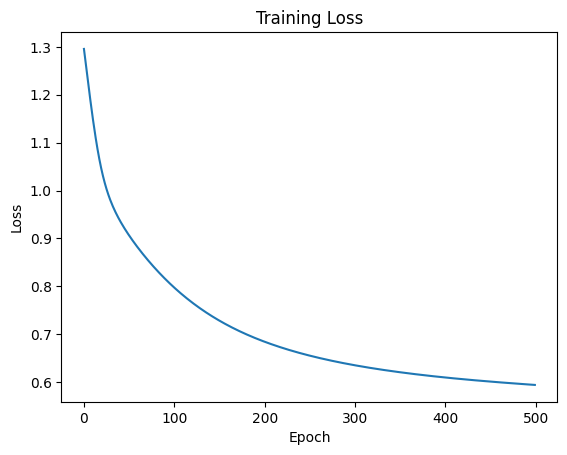

In [160]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


chromosome = data_[30][['x_vals','y_vals','z_vals']]

scaler = StandardScaler()
chromosome_scaled = scaler.fit_transform(chromosome)


# Hyperparameters
nfeat = 2 # Number of encoded features
lr = 0.01
epochs = 500
quiet = False

# Assume data is a NumPy array
input_dim = chromosome_scaled.shape[1]

# Build the autoencoder
class Autoencoder(tf.keras.Model):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = models.Sequential([
            layers.Dense(nfeat, activation='relu'),

        ])
        self.decoder = models.Sequential([
            layers.Dense(input_dim, activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    def build(self, input_shape):
            self.encoder.build(input_shape)
            self.decoder.build((input_shape[0], nfeat))
            super().build(input_shape)

# Initialize model
model = Autoencoder(input_dim)
model.build(input_shape=(None, input_dim))
optimizer = optimizers.Adam(learning_rate=lr)
mse_loss = losses.MeanSquaredError()

# Convert data to tensor
data_tensor = tf.convert_to_tensor(chromosome_scaled, dtype=tf.float32)

# Training loop
losses_list = []
for epoch in tqdm(range(epochs), disable=quiet):
    with tf.GradientTape() as tape:
        output = model(data_tensor)
        loss = mse_loss(data_tensor, output)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    losses_list.append(loss.numpy())

    if not quiet:
        print(f"Epoch {epoch+1}, Loss: {loss.numpy()}")

# Plot losses
plt.figure(2)
plt.plot(losses_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Compute reconstruction error
reconstructed = model(data_tensor)
errors = tf.reduce_mean(tf.math.squared_difference(data_tensor, reconstructed), axis=1)




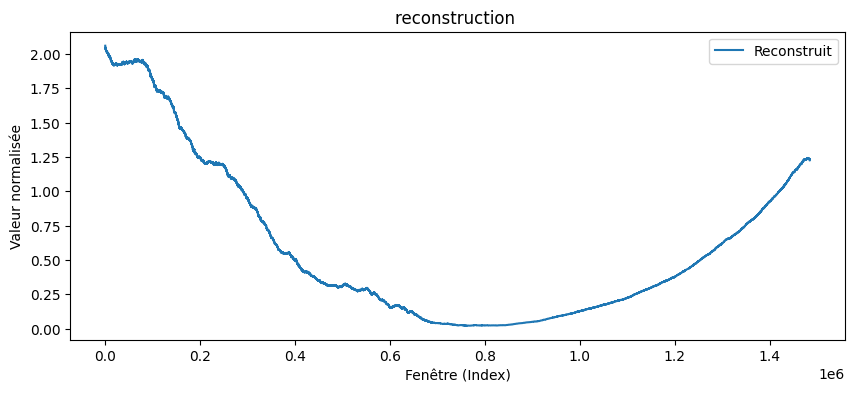

In [161]:
# Reconstruction complète
# Ici reconstructed et data_tensor sont dans l'espace original (2 features)
# Par exemple, comparer la 1ère feature originale et reconstruite
plt.figure(figsize=(10, 4))
plt.plot(errors, label='Reconstruit')
plt.xlabel('Fenêtre (Index)')
plt.ylabel('Valeur normalisée')
plt.title('reconstruction ')
plt.ylim()
plt.legend()
plt.show()

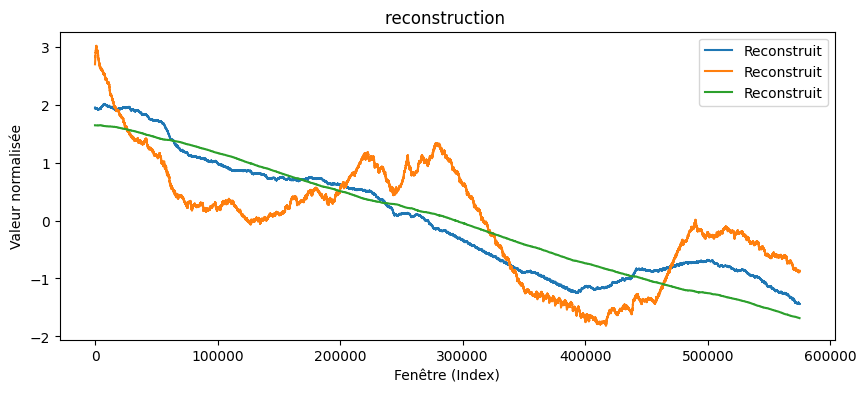

In [151]:
# Reconstruction complète
# Ici reconstructed et data_tensor sont dans l'espace original (2 features)
# Par exemple, comparer la 1ère feature originale et reconstruite
plt.figure(figsize=(10, 4))
plt.plot(chromosome_scaled, label='Reconstruit')
plt.xlabel('Fenêtre (Index)')
plt.ylabel('Valeur normalisée')
plt.title('reconstruction ')
plt.legend()
plt.show()

In [162]:
# Convertir en numpy
errors_np = errors.numpy()

# Taille de la fenêtre
k = 100000
# Liste des médianes locales
local_medians = np.array([
    np.median(errors_np[max(0, i - k//2):min(len(errors_np), i + k//2 + 1)])
    for i in range(len(errors_np))
])

# Re-normaliser
normalized_errors = errors_np / local_medians


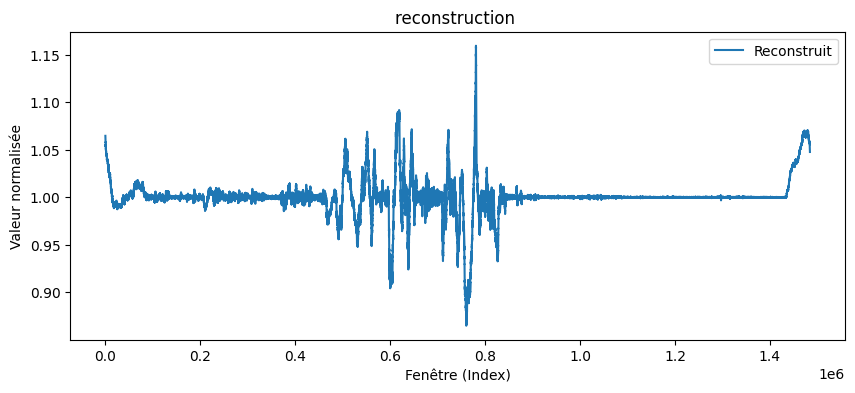

In [163]:
# Reconstruction complète
# Ici reconstructed et data_tensor sont dans l'espace original (2 features)
# Par exemple, comparer la 1ère feature originale et reconstruite
plt.figure(figsize=(10, 4))
plt.plot(normalized_errors, label='Reconstruit')
plt.xlabel('Fenêtre (Index)')
plt.ylabel('Valeur normalisée')
plt.title('reconstruction ')
plt.ylim()
plt.legend()
plt.show()

In [145]:
def count_homopolymers(seq, min_length=5):
    # Ex : trouve AAAAA ou TTTTT, etc.
    pattern = re.compile(rf"(A{{{min_length},}}|T{{{min_length},}}|C{{{min_length},}}|G{{{min_length},}})")
    return len(pattern.findall(seq.upper()))

def load_fasta(fasta_path, window_size=100):
    f = FastA(fasta_path)
    data = []
    
    for maseq in f:
        print(maseq.name)
        features = []

        s = DNA(maseq.sequence.upper())
        seq = maseq.sequence.upper()
        s.window = window_size

        #Karlin
        df_karlin = pd.read_csv(f"../data/karlin/{maseq.name}_karlin_{window_size}.csv")
        karlin = df_karlin['Karlin'].tolist()

        #Entropy
        entropy = s.get_entropy(window_size)
        
        #Z curve 
        y_vals = []
        x_vals = []
        z_vals = []
        for base in seq:
            if len(x_vals) == 0:
                x = 0
                y = 0
                z = 0
            else:
                x = x_vals[-1]
                y = y_vals[-1]
                z = z_vals[-1]
            if base == 'A':
                x += 1
                y += 1
                z += 1
            elif base == 'C':
                x -= 1
                y += 1
                z -= 1
            elif base == 'G':
                x += 1
                y -= 1
                z -= 1
            elif base == 'T':
                x -= 1
                y -= 1
                z += 1
            x_vals.append(x)
            z_vals.append(z)
            y_vals.append(y)
 
        
   
        df= pd.DataFrame({
            'karlin': karlin,
            'x_vals': x_vals,
            'y_vals': y_vals,
            'z_vals': z_vals,
            'entropy':entropy,
        })

        data.append(df)
    return data

data_ = load_fasta("../data/Fasta/TriTrypDB-68_LmajorFriedlin_Genome.fasta")
    

LmjF.01
268988
268988
LmjF.02
355712
355712
LmjF.03
384502
384502
LmjF.04
472852
472852
LmjF.05
465823
465823
LmjF.06
516869
516869
LmjF.07
596352
596352
LmjF.08
574960
574960
LmjF.09
573434
573434
LmjF.10
570865
570865
LmjF.11
582573
582573
LmjF.12
675346
675346
LmjF.13
654595
654595
LmjF.14
622644
622644
LmjF.15
629517
629517
LmjF.16
714651
714651
LmjF.17
684829
684829
LmjF.18
739748
739748
LmjF.19
702208
702208
LmjF.20
742537
742537
LmjF.21
772972
772972
LmjF.22
716602
716602
LmjF.23
772565
772565
LmjF.24
840950
840950
LmjF.25
912845
912845
LmjF.26
1091540
1091540
LmjF.27
1130424
1130424
LmjF.28
1160104
1160104
LmjF.29
1212663
1212663
LmjF.30
1403434
1403434
LmjF.31
1484328
1484328
LmjF.32
1604637
1604637
LmjF.33
1583653
1583653
LmjF.34
1866748
1866748
LmjF.35
2090474
2090474
LmjF.36
2682151
2682151
